In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df_UIUC = pd.read_feather('export_UIUC_feather', columns=None, use_threads=True)
df_UIUC = df_UIUC.drop(['index'], axis = 1)

df_Urbana = pd.read_feather('export_Urbana_feather', columns=None, use_threads=True)

In [60]:
df_Urbana.dtypes
columns = ['new_date', 'PM1.0 (CF=1) ug/m3', 'PM2.5 (CF=1) ug/m3', 'PM10.0 (CF=1) ug/m3',
          'UptimeMinutes', 'ADC', 'Temperature_F', 'Humidity_%', 'PM2.5 (CF=ATM) ug/m3']

In [61]:
df_UIUC.rename(columns={'reading_datestamp': 'new_date'}, inplace = True)

In [62]:
final_df = df_UIUC.merge(df_Urbana, on='new_date')
final_df.head(5)

,new_date,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,...,pressure,humidity,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,...,992.6,63.6,5.431250,7.600000,8.127500,19254.0,-55.625000,68.000000,61.000000,7.600000
1,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,...,992.5,62.5,5.922857,8.282857,8.828571,19269.0,-57.142857,68.000000,61.285714,8.282857
2,2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,...,993.0,61.5,6.103750,8.436250,9.050000,19284.0,-56.750000,68.000000,62.000000,8.436250
3,2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,...,992.3,61.0,6.337143,8.907143,9.751429,19299.0,-55.857143,67.857143,62.000000,8.907143
4,2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,...,992.9,59.8,6.655000,9.141250,9.768750,19314.0,-55.875000,67.000000,62.000000,9.141250


In [63]:
final_df[columns]

,new_date,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,2021-09-02 04:45:00,5.431250,7.600000,8.127500,19254.0,-55.625000,68.000000,61.000000,7.600000
1,2021-09-02 05:00:00,5.922857,8.282857,8.828571,19269.0,-57.142857,68.000000,61.285714,8.282857
2,2021-09-02 05:15:00,6.103750,8.436250,9.050000,19284.0,-56.750000,68.000000,62.000000,8.436250
3,2021-09-02 05:30:00,6.337143,8.907143,9.751429,19299.0,-55.857143,67.857143,62.000000,8.907143
4,2021-09-02 05:45:00,6.655000,9.141250,9.768750,19314.0,-55.875000,67.000000,62.000000,9.141250
...,...,...,...,...,...,...,...,...,...
8527,2021-11-30 14:00:00,10.210000,12.431429,13.192857,1516.0,-57.142857,55.000000,45.000000,12.431429
8528,2021-11-30 14:15:00,9.947500,12.170000,13.123750,1531.0,-58.125000,55.000000,45.000000,12.170000
8529,2021-11-30 14:30:00,9.687143,11.882857,12.958571,1546.0,-58.857143,55.000000,45.000000,11.882857
8530,2021-11-30 14:45:00,9.905000,12.285000,13.297500,1561.0,-57.625000,55.000000,45.000000,12.285000


In [86]:
final_df['new_date']=pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S')
final_df['date'] = pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S').dt.date
final_df['time'] = pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S').dt.time
final_df['dayofweek'] = pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek
final_df[final_df['dayofweek']==0]
# final_df['time'] = final_df['new_date'].time

,new_date,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,...,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3,date,time,dayofweek
365,2021-09-06 00:00:00,317.08,428.22,2.02,4.83,20.89,4.36,5.77,6.80,8.20,...,10.360000,11.085000,24729.0,-55.375000,71.000,54.250000,10.360000,2021-09-06,00:00:00,0
366,2021-09-06 00:15:00,314.10,430.07,1.33,4.86,20.36,4.07,5.21,5.98,8.20,...,9.734286,10.357143,24744.0,-55.142857,71.000,55.000000,9.734286,2021-09-06,00:15:00,0
367,2021-09-06 00:30:00,312.26,431.92,1.26,4.80,18.83,4.18,5.31,6.19,8.69,...,9.191250,9.663750,24759.0,-57.500000,70.625,55.000000,9.191250,2021-09-06,00:30:00,0
368,2021-09-06 00:45:00,312.12,431.92,3.69,4.99,18.60,4.02,5.13,5.87,7.94,...,7.760000,8.162857,24774.0,-56.142857,70.000,55.285714,7.760000,2021-09-06,00:45:00,0
369,2021-09-06 01:00:00,312.77,430.99,3.83,4.84,18.14,4.21,5.31,6.03,8.05,...,7.256250,7.673750,24789.0,-57.125000,70.000,55.000000,7.256250,2021-09-06,01:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,2021-11-29 22:45:00,414.64,768.35,0.72,11.69,30.56,2.15,3.28,4.08,7.61,...,11.168750,11.915000,601.0,-56.625000,44.000,52.000000,11.168750,2021-11-29,22:45:00,0
8467,2021-11-29 23:00:00,398.01,769.19,-0.55,11.65,30.36,2.06,3.35,4.40,6.29,...,12.434286,13.325714,616.0,-57.428571,44.000,52.714286,12.434286,2021-11-29,23:00:00,0
8468,2021-11-29 23:15:00,389.72,767.48,0.31,10.68,30.70,2.10,3.34,4.38,6.88,...,12.913750,13.725000,631.0,-55.875000,44.000,53.125000,12.913750,2021-11-29,23:15:00,0
8469,2021-11-29 23:30:00,384.02,769.19,-0.60,10.37,29.36,2.12,3.26,4.16,5.68,...,13.632857,14.504286,646.0,-58.714286,44.000,54.000000,13.632857,2021-11-29,23:30:00,0


# Base On Time

In [92]:
hour=final_df.drop(labels='new_date',axis=1)
hour=final_df.drop(labels='date',axis=1)
hour=final_df.drop(labels='dayofweek',axis=1)
hour

,new_date,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,...,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3,date,time
0,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,...,5.431250,7.600000,8.127500,19254.0,-55.625000,68.000000,61.000000,7.600000,2021-09-02,04:45:00
1,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,...,5.922857,8.282857,8.828571,19269.0,-57.142857,68.000000,61.285714,8.282857,2021-09-02,05:00:00
2,2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,...,6.103750,8.436250,9.050000,19284.0,-56.750000,68.000000,62.000000,8.436250,2021-09-02,05:15:00
3,2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,...,6.337143,8.907143,9.751429,19299.0,-55.857143,67.857143,62.000000,8.907143,2021-09-02,05:30:00
4,2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,...,6.655000,9.141250,9.768750,19314.0,-55.875000,67.000000,62.000000,9.141250,2021-09-02,05:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8527,2021-11-30 14:00:00,300.71,776.00,3.34,5.50,30.32,3.20,4.52,5.50,9.11,...,10.210000,12.431429,13.192857,1516.0,-57.142857,55.000000,45.000000,12.431429,2021-11-30,14:00:00
8528,2021-11-30 14:15:00,303.22,775.16,2.44,5.20,29.64,3.21,4.38,5.31,9.70,...,9.947500,12.170000,13.123750,1531.0,-58.125000,55.000000,45.000000,12.170000,2021-11-30,14:15:00
8529,2021-11-30 14:30:00,313.67,776.00,3.17,5.35,29.84,3.20,4.41,5.38,9.14,...,9.687143,11.882857,12.958571,1546.0,-58.857143,55.000000,45.000000,11.882857,2021-11-30,14:30:00
8530,2021-11-30 14:45:00,309.89,776.85,5.20,4.53,33.18,3.15,4.51,5.44,8.46,...,9.905000,12.285000,13.297500,1561.0,-57.625000,55.000000,45.000000,12.285000,2021-11-30,14:45:00


In [81]:
final_hour = hour.groupby('time').agg('mean').reset_index()
final_hour

,time,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,...,pressure,humidity,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,00:00:00,340.204607,621.651798,5.139551,6.925056,23.881573,5.072159,7.109773,8.984659,12.633977,...,989.853933,73.819101,9.370602,12.025020,13.211880,24173.556982,-55.413122,60.954454,56.799960,11.870455
1,00:15:00,340.154831,620.519663,5.103146,6.814944,23.599213,5.070455,6.970114,8.641591,12.008523,...,989.887640,74.043820,9.434093,12.132083,13.309579,24188.561798,-55.319222,60.783507,57.101525,11.955933
2,00:30:00,339.217303,620.677978,5.049213,6.594045,23.353146,5.112955,7.021477,8.697500,11.994318,...,989.804494,74.292135,9.449753,12.124342,13.336116,24203.505618,-55.449839,60.605538,57.282905,11.953030
3,00:45:00,337.622614,619.342614,5.416477,6.636591,22.893977,5.152874,7.032529,8.638966,11.750115,...,989.798864,74.476136,9.302403,11.969915,13.207599,24421.050325,-55.441558,60.669440,57.467735,11.803732
4,01:00:00,340.707556,623.203778,5.227444,7.196000,22.906111,5.169888,7.092921,8.779551,11.965843,...,989.846667,74.592222,9.331629,12.069208,13.325293,24156.718519,-55.546534,60.168056,57.668452,11.901214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,22:45:00,340.197079,618.960787,4.933371,7.711910,25.175393,4.852614,6.606591,8.065455,11.195682,...,989.826966,72.768539,9.558337,12.378989,13.638236,24098.550562,-55.520465,61.840490,55.433989,12.149115
92,23:00:00,338.768764,619.379213,4.989213,7.640674,24.711573,4.890795,6.711250,8.248409,11.295795,...,989.795506,72.869663,9.584769,12.332727,13.626641,24113.550562,-55.591693,61.630819,55.705658,12.111746
93,23:15:00,339.005281,619.380225,5.157191,7.454719,24.492360,4.960909,6.807955,8.381818,11.639659,...,989.785393,73.078652,9.546888,12.260383,13.546792,24128.553772,-55.422151,61.435795,56.022873,12.079990
94,23:30:00,338.754494,620.427191,5.135393,7.025618,24.455393,5.021591,6.918409,8.565341,11.859545,...,989.804494,73.341573,9.763600,12.447418,13.687963,24143.563202,-55.290329,61.249398,56.296750,12.247063


<AxesSubplot:xlabel='time', ylabel='pm2_5_prescale'>

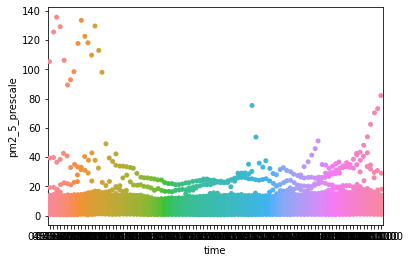

In [93]:
sns.stripplot(x='time',y='pm2_5_prescale',data=hour)

<AxesSubplot:xlabel='time', ylabel='pm2_5_prescale'>

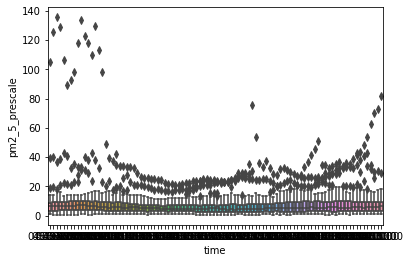

In [94]:
sns.boxplot(x='time',y='pm2_5_prescale',data=hour)

<AxesSubplot:title={'center':'TimeLine'}, xlabel='time'>

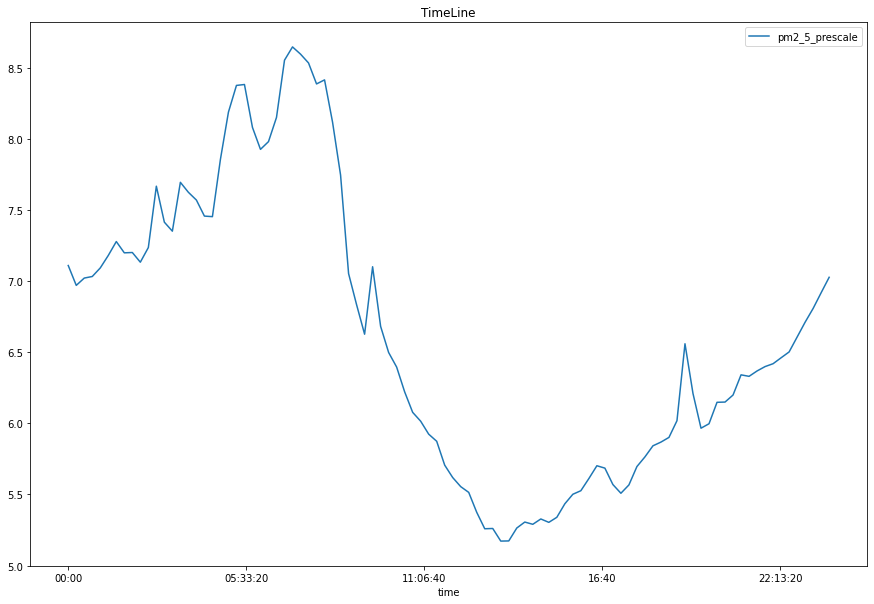

In [79]:
df_line = final_hour[['time', 'pm2_5_prescale']]
df_line.plot(x = 'time', y = 'pm2_5_prescale', figsize = (15,10), title = 'TimeLine')

# Based on DayofWeek

In [84]:
dayofweek=final_df.drop(labels='new_date',axis=1)
dayofweek=final_df.drop(labels='date',axis=1)
dayofweek=final_df.drop(labels='time',axis=1)
final_dayofweek = hour.groupby('dayofweek').agg('mean').reset_index()
final_dayofweek

,dayofweek,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,...,pressure,humidity,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,0,328.925000,614.812576,9.512705,9.831982,28.658892,3.964213,5.349695,6.377825,9.275722,...,989.365329,68.535393,8.166960,10.327504,11.130204,23764.421420,-55.348998,63.796506,52.704211,10.265906
1,1,334.854431,612.716155,9.221205,9.620883,26.106452,5.305654,7.178485,8.623949,11.974843,...,990.662046,69.830363,10.268303,13.446710,14.811736,24630.013476,-56.006810,63.916637,54.836531,12.649336
2,2,324.175632,618.803330,7.591101,8.219126,28.458499,6.346542,9.038571,11.410883,15.343130,...,990.045496,68.733303,11.755157,15.362590,16.794189,28174.328935,-56.082494,65.057959,54.732322,13.980206
3,3,320.314800,618.059152,7.513170,7.808761,27.058411,4.412207,6.081739,7.486546,10.619631,...,989.533659,68.420130,8.454567,10.833209,11.844127,26502.069233,-55.936990,63.917207,53.324785,10.790239
4,4,331.905449,615.854127,8.486178,7.858878,27.603165,3.968825,6.147763,8.273930,12.574749,...,990.455288,68.342628,6.915796,9.257163,10.168280,23043.234375,-55.537226,62.621265,53.631782,9.182359
5,5,333.780513,614.110072,9.546282,7.900633,27.785713,4.837428,6.431018,7.626955,10.461923,...,988.834054,69.731410,9.536075,12.235714,13.360470,21493.448780,-55.148366,63.321114,54.839915,12.173641
6,6,321.987556,615.815048,9.427987,7.923027,29.340998,4.639625,6.409105,7.801238,10.799201,...,988.545288,67.644169,9.265062,11.830102,12.870118,22940.267667,-55.444612,64.806895,52.632925,11.809327


<AxesSubplot:xlabel='dayofweek', ylabel='pm2_5_prescale'>

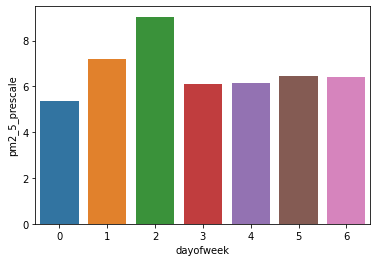

In [88]:
sns.barplot(x='dayofweek',y='pm2_5_prescale',data=final_dayofweek)

<AxesSubplot:xlabel='dayofweek', ylabel='pm2_5_prescale'>

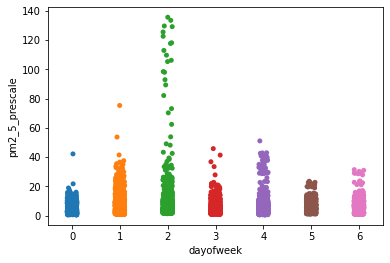

In [90]:
sns.stripplot(x='dayofweek',y='pm2_5_prescale',data=dayofweek)

<AxesSubplot:xlabel='dayofweek', ylabel='pm2_5_prescale'>

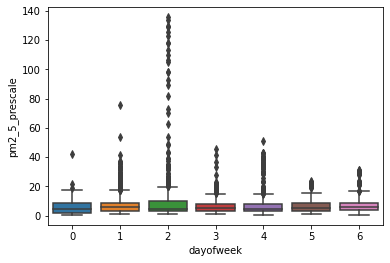

In [95]:
sns.boxplot(x='dayofweek',y='pm2_5_prescale',data=dayofweek)